In [3]:
import numpy as np 

import pandas as pd 

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay 

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


import datetime
import shap

In [4]:
df = pd.read_csv("cardio_train.csv", delimiter=";")
df.to_csv("cardio_train_fixed.csv", index=False) 

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [5]:
df["cardio"].value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

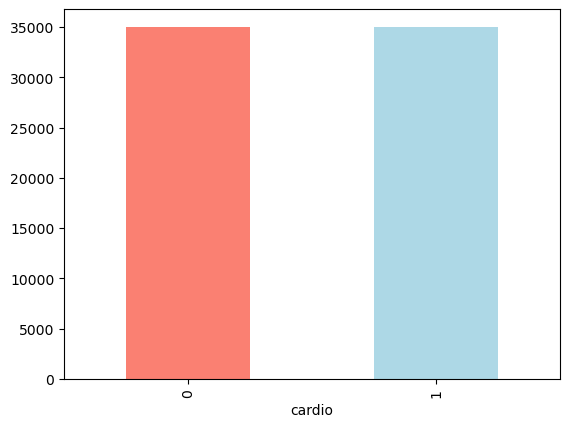

In [6]:
df["cardio"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [8]:
# Are there any missing values?
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [9]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# Compare target column with gender column
pd.crosstab(df.cardio, df.gender)

gender,1,2
cardio,,
0,22914,12107
1,22616,12363


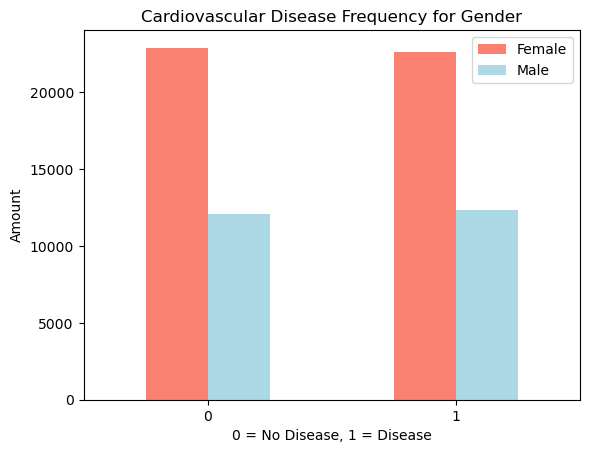

In [11]:
# Create a plot of crosstab
pd.crosstab(df.cardio, df.gender).plot(kind="bar", color=["salmon", "lightblue"])
plt.title("Cardiovascular Disease Frequency for Gender")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);

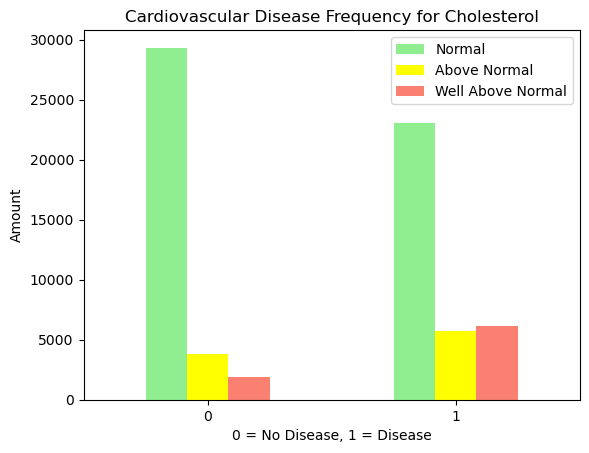

In [12]:
# Create a plot of crosstab
pd.crosstab(df.cardio, df.cholesterol).plot(kind="bar", color=["lightgreen", "yellow", "salmon"])
plt.title("Cardiovascular Disease Frequency for Cholesterol")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Normal","Above Normal","Well Above Normal"]);
plt.xticks(rotation=0);

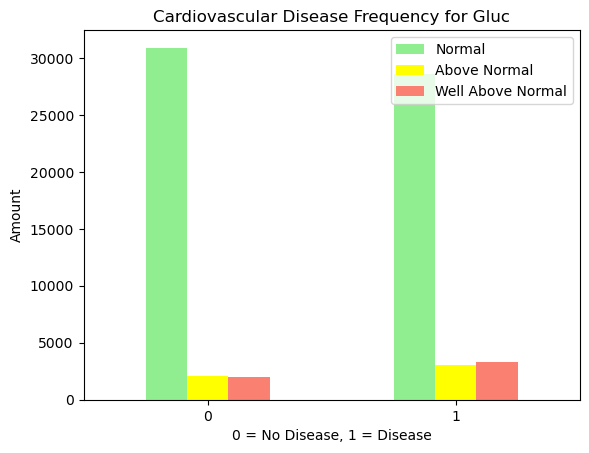

In [13]:
# Create a plot of crosstab
pd.crosstab(df.cardio, df.gluc).plot(kind="bar", color=["lightgreen", "yellow", "salmon"])
plt.title("Cardiovascular Disease Frequency for Gluc")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Normal","Above Normal","Well Above Normal"]);
plt.xticks(rotation=0);

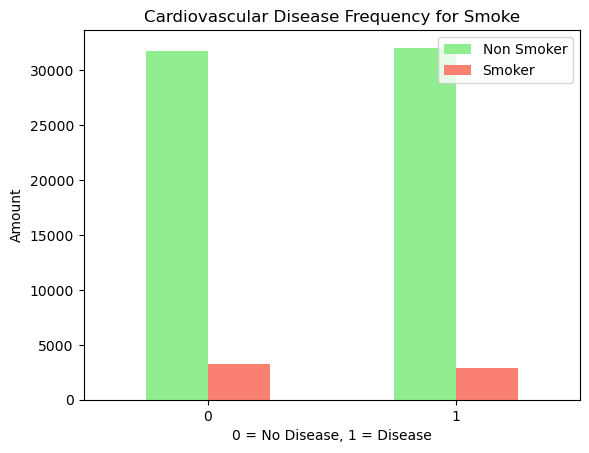

In [14]:
# Create a plot of crosstab
pd.crosstab(df.cardio, df.smoke).plot(kind="bar", color=["lightgreen", "salmon"])
plt.title("Cardiovascular Disease Frequency for Smoke")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Non Smoker","Smoker"]);
plt.xticks(rotation=0);

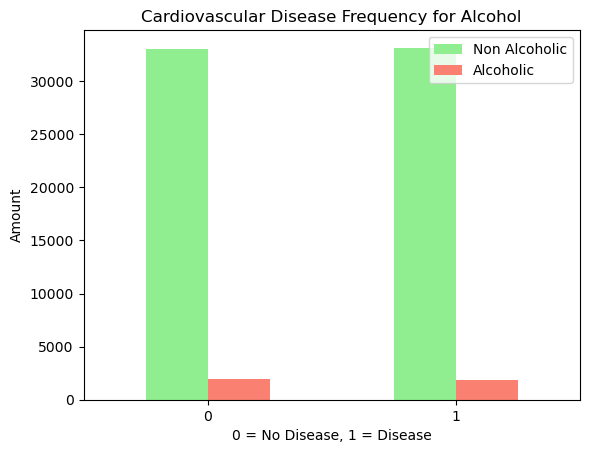

In [15]:
# Create a plot of crosstab
pd.crosstab(df.cardio, df.alco).plot(kind="bar", color=["lightgreen", "salmon"])
plt.title("Cardiovascular Disease Frequency for Alcohol")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Non Alcoholic","Alcoholic"]);
plt.xticks(rotation=0);

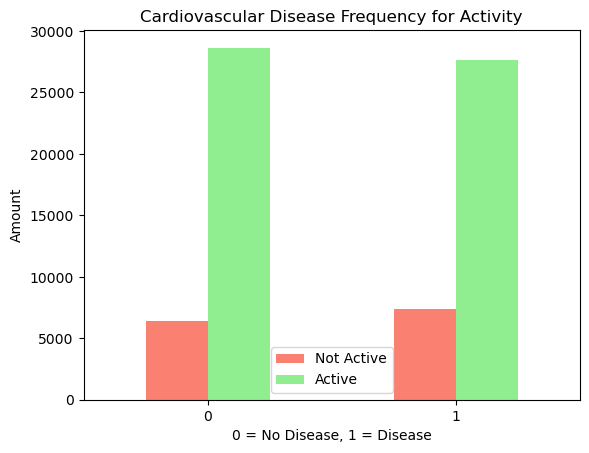

In [16]:
# Create a plot of crosstab
pd.crosstab(df.cardio, df.active).plot(kind="bar", color=["salmon", "lightgreen"])
plt.title("Cardiovascular Disease Frequency for Activity")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Not Active","Active"]);
plt.xticks(rotation=0);

In [17]:
pd.crosstab(df.cardio, df.gender)

gender,1,2
cardio,,
0,22914,12107
1,22616,12363


In [18]:
pd.crosstab(df.cardio, df.cholesterol)

cholesterol,1,2,3
cardio,,,
0,29330,3799,1892
1,23055,5750,6174


In [19]:
pd.crosstab(df.cardio, df.gluc)

gluc,1,2,3
cardio,,,
0,30894,2112,2015
1,28585,3078,3316


In [20]:
pd.crosstab(df.cardio, df.smoke)

smoke,0,1
cardio,,
0,31781,3240
1,32050,2929


In [21]:
pd.crosstab(df.cardio, df.alco)

alco,0,1
cardio,,
0,33080,1941
1,33156,1823


In [22]:
pd.crosstab(df.cardio, df.active)

active,0,1
cardio,,
0,6378,28643
1,7361,27618


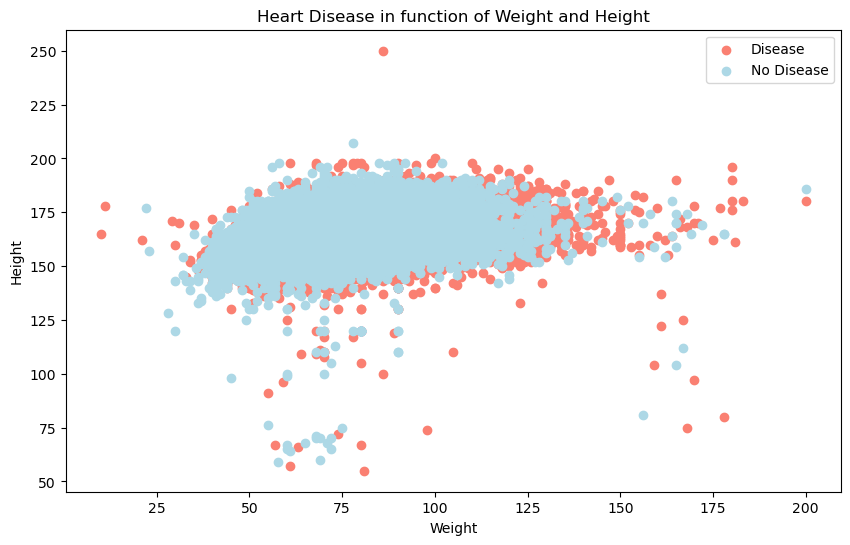

In [23]:
plt.figure(figsize=(10,6))

plt.scatter(df.weight[df.cardio==1], df.height[df.cardio==1], c="salmon")

plt.scatter(df.weight[df.cardio==0], df.height[df.cardio==0], c="lightblue")

plt.title("Heart Disease in function of Weight and Height")
plt.xlabel("Weight")
plt.ylabel("Height")
plt.legend(["Disease", "No Disease"])


Text(0.5, 0, 'Age in days')

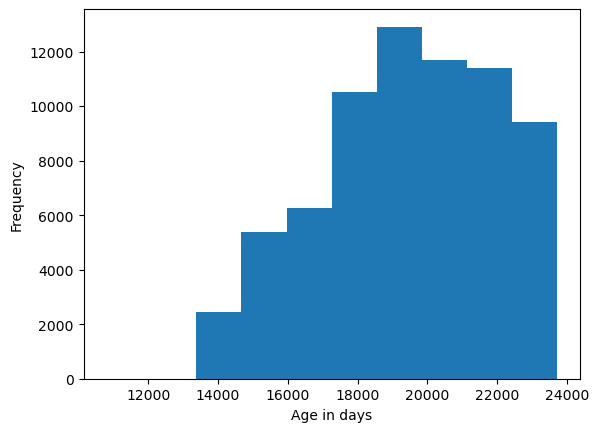

In [24]:
df.age.plot.hist()
plt.xlabel("Age in days")

Text(0.5, 0, 'Height')

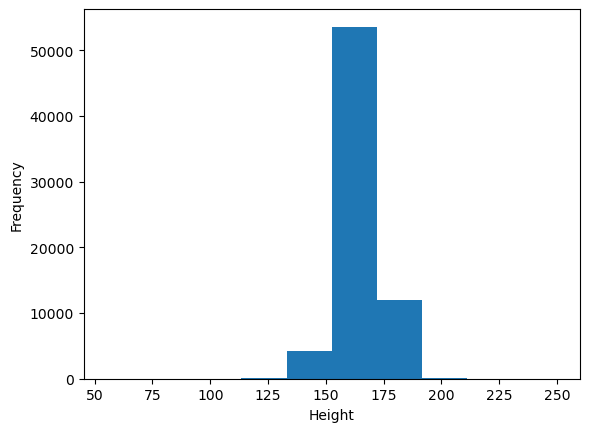

In [25]:
df.height.plot.hist()
plt.xlabel("Height")

Text(0.5, 0, 'Weight')

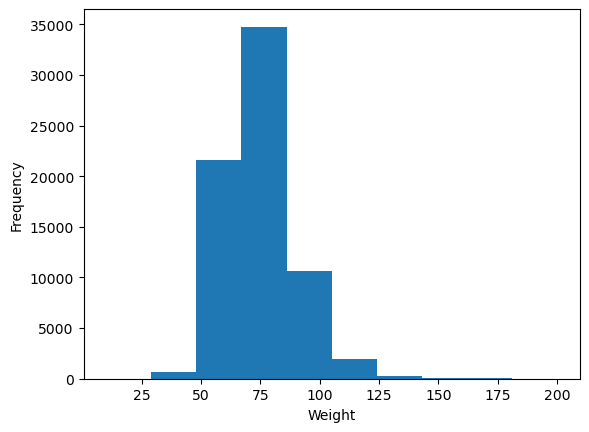

In [26]:
df.weight.plot.hist()
plt.xlabel("Weight")

Text(0.5, 0, 'ap_hi')

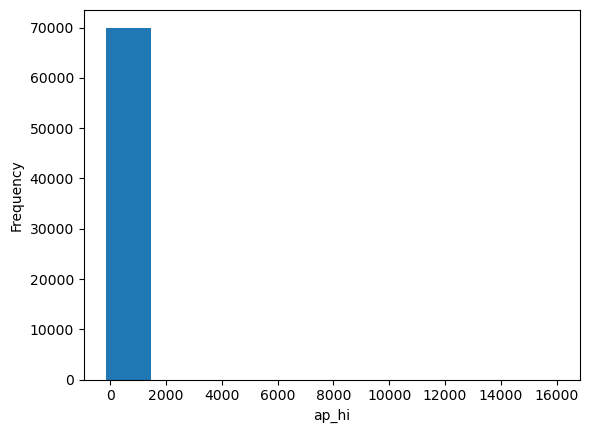

In [27]:
df.ap_hi.plot.hist()
plt.xlabel("ap_hi")

Text(0.5, 0, 'ap_lo')

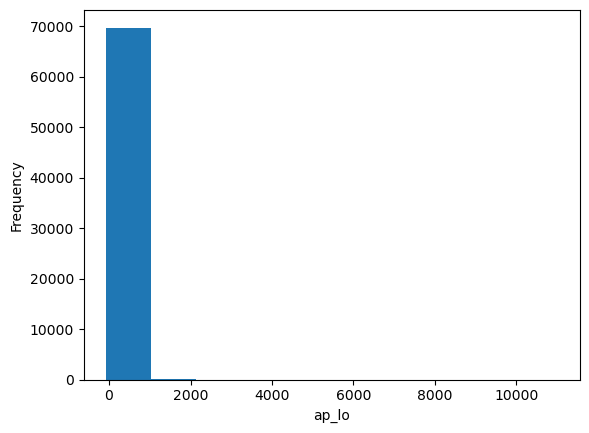

In [28]:
df.ap_lo.plot.hist()
plt.xlabel("ap_lo")

In [29]:
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486


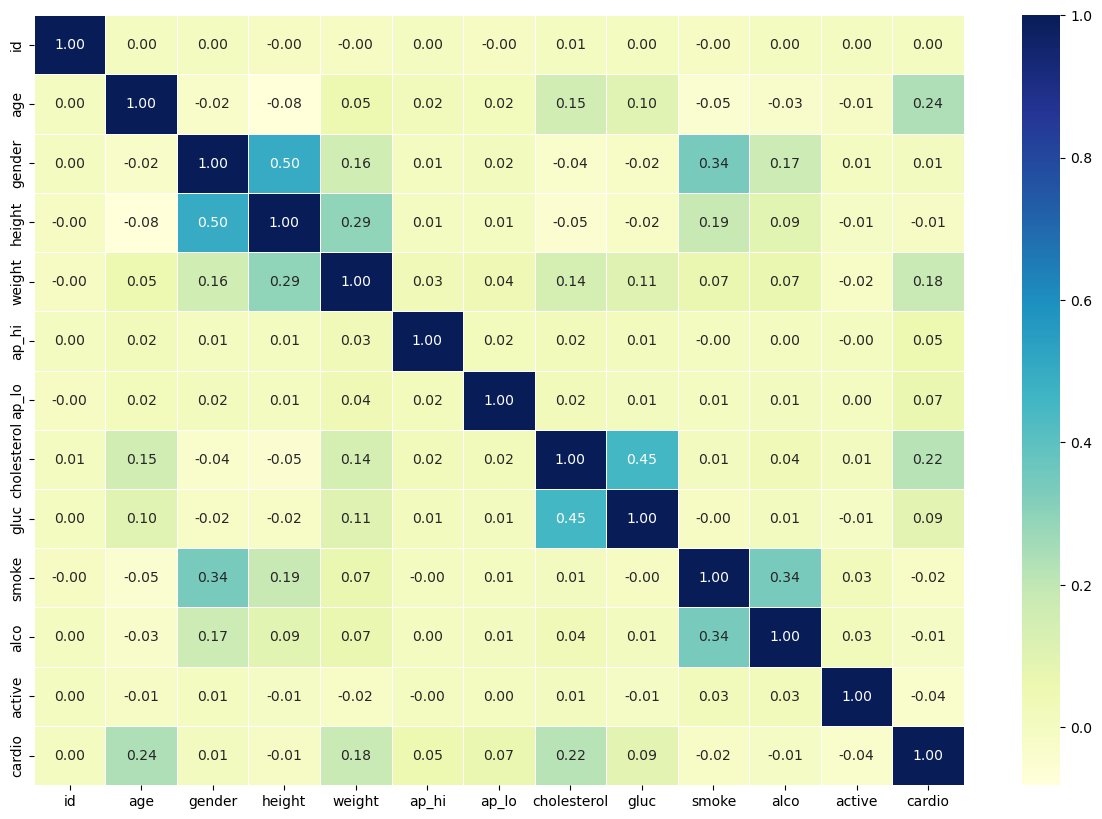

In [30]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, annot =True, linewidths = 0.5, fmt= ".2f", cmap="YlGnBu" )
bottom, top = ax.get_ylim()


In [31]:
# Modeling
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
# Split data into x and y
X = df.drop("cardio", axis=1)
y= df["cardio"]

In [33]:
X

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,0,18393,2,168,62.0,110,80,1,1,0,0,1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0


In [34]:
y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

In [6]:
# Split data into train and test sets
np.random.seed(42)

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [36]:
X_train

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
47339,67617,21876,1,154,80.0,130,90,2,1,0,0,1
67456,96320,16717,2,162,70.0,140,90,1,1,0,0,0
12308,17571,21128,2,174,92.0,150,100,1,1,0,0,1
32557,46492,23366,2,173,76.0,120,82,1,1,0,0,1
664,945,20281,1,160,60.0,120,80,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
37194,53137,16001,2,170,75.0,150,80,1,1,1,0,1
6265,8918,23209,2,162,73.0,160,90,1,1,0,0,1
54886,78302,23589,1,169,74.0,120,80,1,1,0,0,1
860,1197,18227,1,167,70.0,120,80,1,1,0,0,0


In [37]:
y_train, len(y_train)

(47339    1
 67456    1
 12308    1
 32557    1
 664      0
         ..
 37194    1
 6265     1
 54886    0
 860      0
 15795    0
 Name: cardio, Length: 56000, dtype: int64,
 56000)

In [7]:
# put models in a dictionary
models = {"Logistic Regression": LogisticRegression(), "KNN":KNeighborsClassifier(),"Naive Bayes": GaussianNB(),"Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC()}

# Create a fucntion to fit and score models
def fit_and_score(models, X_train, X_test, y_train,y_test):

    # set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    #loop through models
    for name,model in models.items():
        #fir the model to the data
        model.fit(X_train,y_train)
        #Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test,y_test)
    return model_scores
     

In [39]:
model_scores = fit_and_score(models=models, X_train=X_train, X_test=X_test,y_train=y_train,y_test=y_test)

model_scores

C:\Users\GAMING3\Desktop\ML_Project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.6987857142857142,
 'KNN': 0.5541428571428572,
 'Naive Bayes': 0.5739285714285715,
 'Decision Tree': 0.6354285714285715,
 'SVM': 0.5950714285714286}

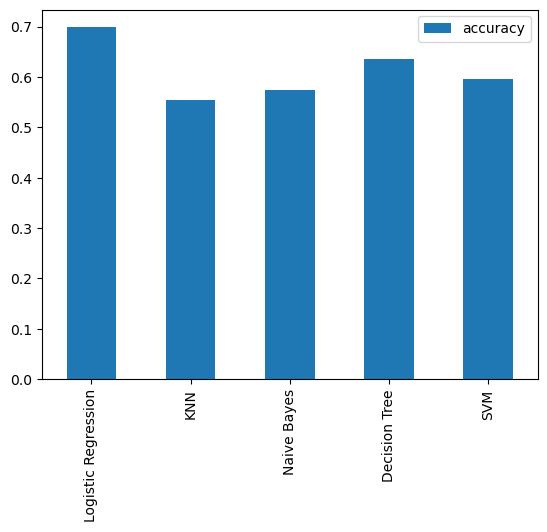

In [40]:
# model comparison 
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

In [41]:
train_scores = []
test_scores = []
#create a list of different values for n neighbors
neighbors = range(1,21)

#settp KNN instances
knn = KNeighborsClassifier()

#loop through different n_nighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    #fir the algorithm
    knn.fit(X_train, y_train)

    #update the training scores list
    train_scores.append(knn.score(X_train,y_train))

    #update the test scores list
    test_scores.append(knn.score(X_test,y_test))

In [42]:
train_scores

[1.0,
 0.7682857142857142,
 0.7726785714285714,
 0.7141607142857143,
 0.7155357142857143,
 0.6853571428571429,
 0.6874285714285714,
 0.6702857142857143,
 0.6710892857142857,
 0.6620714285714285,
 0.6627678571428571,
 0.6510357142857143,
 0.652875,
 0.6449642857142858,
 0.6467678571428571,
 0.6404464285714285,
 0.6421428571428571,
 0.6360714285714286,
 0.637375,
 0.632625]

In [43]:
test_scores

[0.5395714285714286,
 0.5382142857142858,
 0.5504285714285714,
 0.5476428571428571,
 0.5541428571428572,
 0.5515,
 0.5570714285714286,
 0.5558571428571428,
 0.5637142857142857,
 0.5645714285714286,
 0.5685,
 0.5677857142857143,
 0.5699285714285715,
 0.5705,
 0.5725714285714286,
 0.5743571428571429,
 0.574,
 0.5735714285714286,
 0.5741428571428572,
 0.575]

Maximum KNN score on the test data: 100.58%


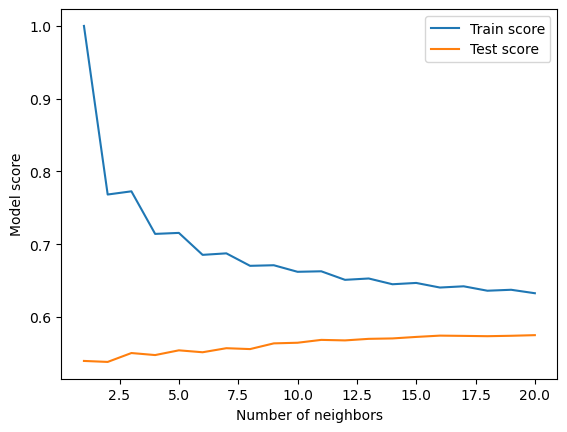

In [44]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
#plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)+100:.2f}%")

In [45]:
#Create a hyperparameter grif for logistic regression 
log_reg_grid = {"C": np.logspace(-4,4,20), "solver":["liblinear"]}

#Create a hyperparameter grif for Random forest
rf_grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2) }

In [46]:
#Tune logistic regression
np.random.seed(42)

#setup random hyperprameter search for logstic regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# fit random hyperparameter search model for logistic regression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [47]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(78.47599703514607)}

In [48]:
rs_log_reg.score(X_test,y_test)

0.7119285714285715

In [8]:
# Hyperparameter tuning with GridSearchCV
#different hyperparametrs for our logisticregression model

log_reg_grid = {"C": np.logspace(-4,4,30),
               "solver":["liblinear"]}

#setup grid hyperparameter search for logistic regression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid =log_reg_grid,
                         cv=5,
                         verbose=True) 
# fit random hyperparameter search model for random forest
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [9]:
#check the best hyperparameters
gs_log_reg.best_params_


{'C': np.float64(2.592943797404667), 'solver': 'liblinear'}

In [10]:
#evaluate the gridsearch logistic regression model
gs_log_reg.score(X_test,y_test)

0.7125

In [11]:
# evaluting our yuned machne learning classifier, beyond accuracy
y_preds = gs_log_reg.predict(X_test)

In [12]:
y_preds

array([1, 1, 1, ..., 0, 1, 1], shape=(14000,))

In [13]:
y_test

46730    1
48393    1
41416    1
34506    1
43725    0
        ..
21525    1
16276    1
24390    0
28061    1
63452    1
Name: cardio, Length: 14000, dtype: int64

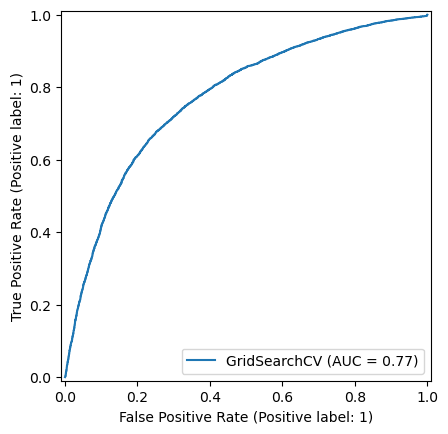

In [14]:
#plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)


In [15]:
# confusion matrix
print(confusion_matrix(y_test, y_preds))

[[5225 1763]
 [2262 4750]]


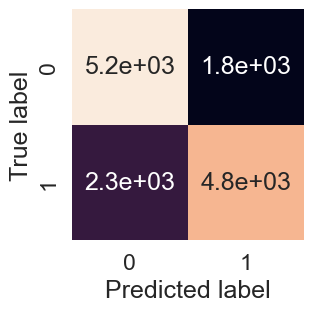

In [16]:
sns.set(font_scale=1.5) # Increase font size
 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

In [17]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.70      0.75      0.72      6988
           1       0.73      0.68      0.70      7012

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.71     14000
weighted avg       0.71      0.71      0.71     14000



In [18]:
# calculate evaluation metrics using cross-validation
#check best hyperparameters
gs_log_reg.best_params_

{'C': np.float64(2.592943797404667), 'solver': 'liblinear'}

In [19]:
clf = LogisticRegression(C=2.592943797404667,
                        solver ="liblinear")


In [20]:
#cross-validated accuracy
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="accuracy")
cv_acc

array([0.69757143, 0.7105    , 0.70407143, 0.71678571, 0.70692857])

In [21]:
cv_acc = np.mean(cv_acc)
cv_acc

np.float64(0.7071714285714286)

In [22]:
#cross-validated precision
cv_precision = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

np.float64(0.7231878878438129)

In [23]:
#cross-validated recall
cv_recall = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

np.float64(0.6711743706502766)

In [24]:
#cross-validated f1-score
cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

np.float64(0.6961325816151207)

<Axes: title={'center': 'Cross-validated classification metrics'}>

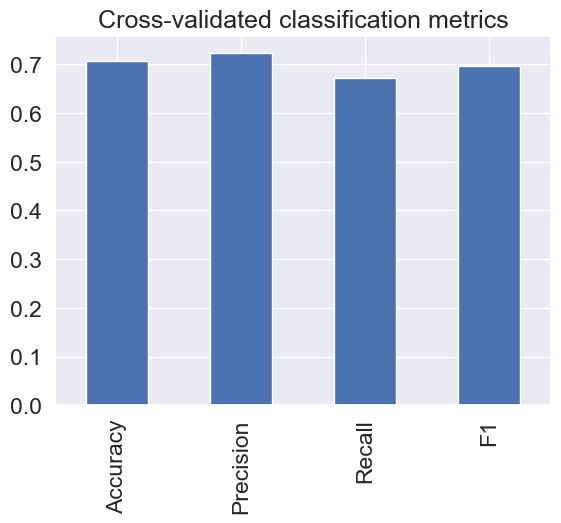

In [25]:
# visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                          "Precision":cv_precision,
                          "Recall": cv_recall,
                          "F1":cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                     legend=False)

In [26]:
#feature importance: which feature contributed most to the outcome?
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [27]:
#fir an instance of Logistic regression
gs_log_reg.best_params_

clf = LogisticRegression(C=2.592943797404667,
                           solver="liblinear")

clf.fit(X_train,y_train);


In [28]:
#check coef_
clf.coef_

array([[-8.41977811e-07,  1.04799302e-04,  3.07355487e-01,
        -4.69295317e-02,  1.80953991e-02,  3.17499370e-02,
         3.36997193e-04,  5.36334092e-01, -1.64096494e-01,
        -1.20591279e-01, -1.73659892e-01, -2.91515707e-01]])

In [29]:
# match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'id': np.float64(-8.419778107490808e-07),
 'age': np.float64(0.00010479930218477702),
 'gender': np.float64(0.3073554868111933),
 'height': np.float64(-0.046929531651060535),
 'weight': np.float64(0.018095399115464705),
 'ap_hi': np.float64(0.03174993698927682),
 'ap_lo': np.float64(0.00033699719261428483),
 'cholesterol': np.float64(0.5363340916110447),
 'gluc': np.float64(-0.16409649384331187),
 'smoke': np.float64(-0.12059127925418782),
 'alco': np.float64(-0.1736598918276601),
 'active': np.float64(-0.29151570662947873)}

<Axes: title={'center': 'Feature Importance'}>

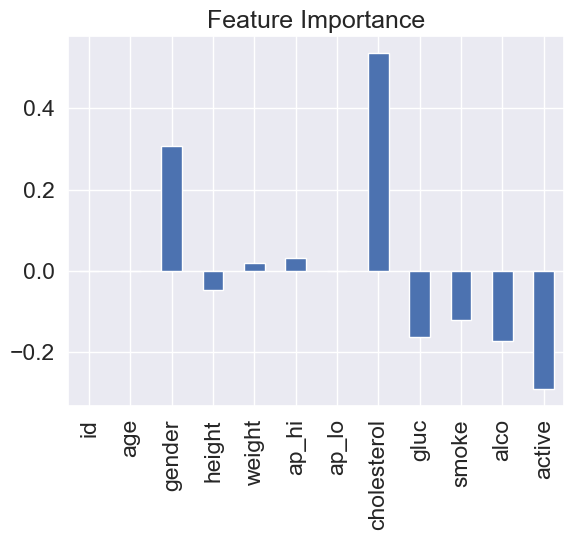

In [30]:
#visialize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False)

In [31]:
pd.crosstab(df["cholesterol"], df["cardio"])

cardio,0,1
cholesterol,,
1,29330,23055
2,3799,5750
3,1892,6174


C:\Users\GAMING3\AppData\Local\Temp\ipykernel_16628\1076001515.py:3: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, plot_type="bar")


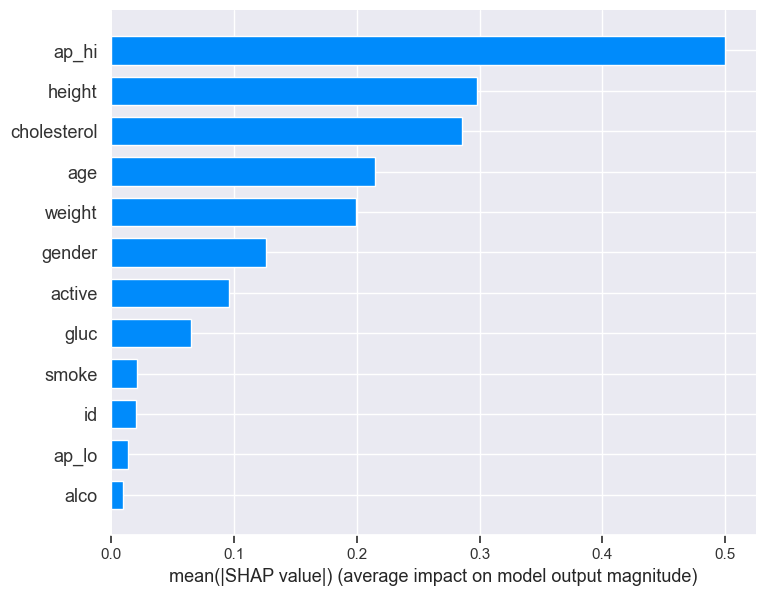

In [32]:
explainer = shap.LinearExplainer(clf, X_train)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [33]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

C:\Users\GAMING3\AppData\Local\Temp\ipykernel_16628\2013061148.py:3: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_female, X_test[X_test["gender"] == 1])


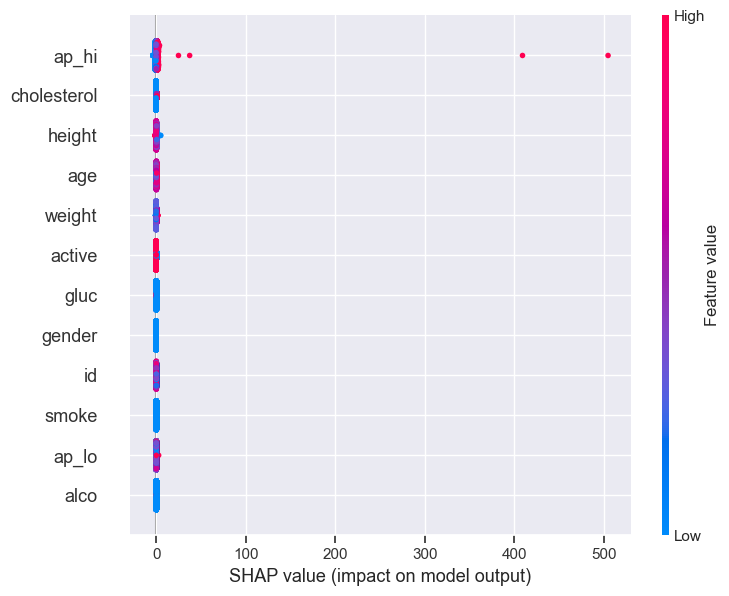

In [34]:
# SHAP analysis for females
shap_values_female = explainer.shap_values(X_test[X_test["gender"] == 1])
shap.summary_plot(shap_values_female, X_test[X_test["gender"] == 1])